In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist


2024-10-22 15:24:40.779761: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-22 15:24:40.930657: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-22 15:24:41.461478: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/walid/miniconda3/envs/tf_gpu_3.9/lib/
2024-10-22 15:24:41.461549: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfe

In [ ]:
(x_train_full, y_train_full), (x_test_full, y_test_full) = mnist.load_data()

In [ ]:
x_full = np.concatenate((x_train_full, x_test_full), axis=0)
y_full = np.concatenate((y_train_full, y_test_full), axis=0)

# Taking 20% of the combined dataset
x_half, _, y_half, _ = train_test_split(x_full, y_full, test_size=0.8, random_state=42)

# Spliting the 20% data into training (70%), validation (15%), and testing (15%)
x_train, x_temp, y_train, y_temp = train_test_split(x_half, y_half, test_size=0.30, random_state=42)  # 70% training
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.50, random_state=42)  # 15% validation, 15% test

In [ ]:
x_train = x_train.astype('float32') / 255.0
x_val = x_val.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [ ]:
import cv2
# Reshape MNIST images to 224x224x3 to match VGG16's input
def preprocess_images(images):
    resized_images = np.array([cv2.resize(img, (224, 224)) for img in images])
    rgb_images = np.repeat(resized_images[..., np.newaxis], 3, axis=-1)  # Convert grayscale to RGB
    return rgb_images

In [ ]:
len(x_train)

9800

In [ ]:
x_train = preprocess_images(x_train)

In [ ]:
x_train.shape

(9800, 224, 224, 3)

In [ ]:
x_val = preprocess_images(x_val)

In [ ]:
x_test = preprocess_images(x_test)

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_val = tf.keras.utils.to_categorical(y_val, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [ ]:
y_train[6]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

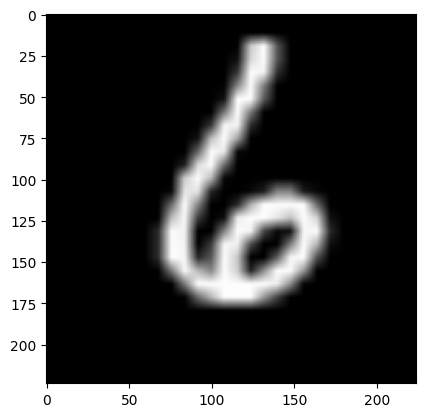

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[6])

In [ ]:
x_train[0]

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [ ]:
#pre-trained
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

xception_base= tf.keras.applications.Xception(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

2024-10-22 15:49:27.049818: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-10-22 15:49:27.088225: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-10-22 15:49:27.088391: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-10-22 15:49:27.093062: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [ ]:
# Freeze the base layers to retain the pre-trained knowledge
vgg_base.trainable = False

In [ ]:
model = Sequential([
    vgg_base,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])


model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=10,       # Rotate images up to 10 degrees
    zoom_range=0.1,          # Zoom in by 10%
    width_shift_range=0.1,   # Shift width by 10%
    height_shift_range=0.1,  # Shift height by 10%
    horizontal_flip=False,   # No horizontal flipping (since digits can’t be flipped)
    fill_mode='nearest'      # Fill any missing pixels after transformations
)


In [ ]:
batch_size = 16
epochs = 6

history = model.fit(datagen.flow(x_train, y_train, batch_size=batch_size),
                    validation_data=(x_val, y_val),
                    steps_per_epoch=len(x_train) // batch_size,
                    epochs=epochs)

Epoch 1/6


2024-10-22 15:49:55.892976: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2024-10-22 15:49:57.005352: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-10-22 15:49:57.005735: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-10-22 15:49:57.005750: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2024-10-22 15:49:57.006143: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-10-22 15:49:57.006176: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


612/612 [==============================] - ETA: 0s - loss: 0.5830 - accuracy: 0.8344

2024-10-22 15:51:26.565028: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1264435200 exceeds 10% of free system memory.
2024-10-22 15:51:27.410999: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1264435200 exceeds 10% of free system memory.


612/612 [==============================] - 114s 176ms/step - loss: 0.5830 - accuracy: 0.8344 - val_loss: 0.1080 - val_accuracy: 0.9781
Epoch 2/6
612/612 [==============================] - 108s 176ms/step - loss: 0.2267 - accuracy: 0.9353 - val_loss: 0.0760 - val_accuracy: 0.9781
Epoch 3/6
612/612 [==============================] - 118s 193ms/step - loss: 0.1732 - accuracy: 0.9489 - val_loss: 0.0693 - val_accuracy: 0.9795
Epoch 4/6
612/612 [==============================] - 121s 197ms/step - loss: 0.1441 - accuracy: 0.9565 - val_loss: 0.0602 - val_accuracy: 0.9810
Epoch 5/6
612/612 [==============================] - 130s 212ms/step - loss: 0.1299 - accuracy: 0.9610 - val_loss: 0.0542 - val_accuracy: 0.9829
Epoch 6/6
612/612 [==============================] - 137s 223ms/step - loss: 0.1137 - accuracy: 0.9672 - val_loss: 0.0567 - val_accuracy: 0.9819


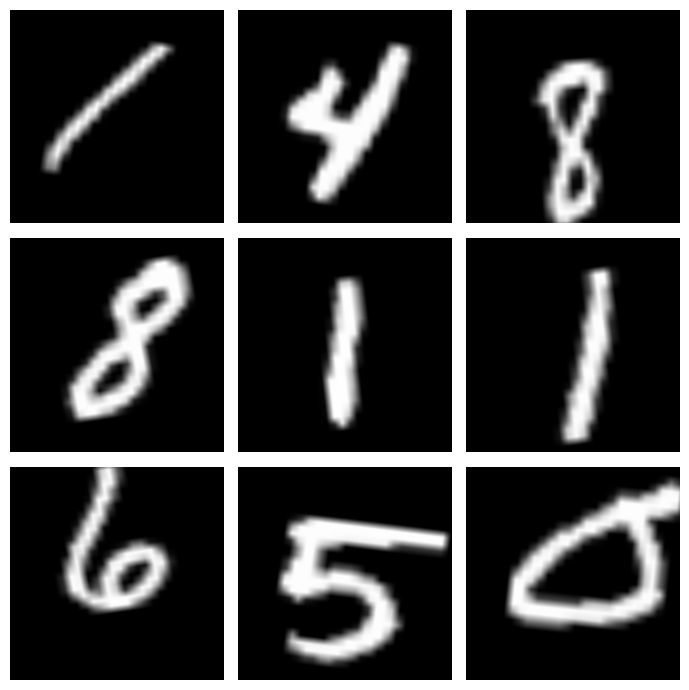

In [ ]:
augmented_images = []
augmented_labels = []
for X_batch, y_batch in datagen.flow(x_train, y_train, batch_size=16, shuffle=False):
    for i in range(9):
        augmented_images.append(X_batch[i])
        augmented_labels.append(y_batch[i])
    if len(augmented_images) >= 9:
        break

augmented_images = np.array(augmented_images)
augmented_labels = np.array(augmented_labels)


fig, axes = plt.subplots(3, 3, figsize=(7, 7))
axes = axes.flatten()

for img, ax in zip(augmented_images[:81], axes):
    ax.imshow(img.squeeze(), cmap='gray')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')

2024-10-22 16:10:24.786633: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1264435200 exceeds 10% of free system memory.
2024-10-22 16:10:25.551299: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1264435200 exceeds 10% of free system memory.


66/66 [==============================] - 6s 97ms/step - loss: 0.0442 - accuracy: 0.9871
Test accuracy: 0.9871


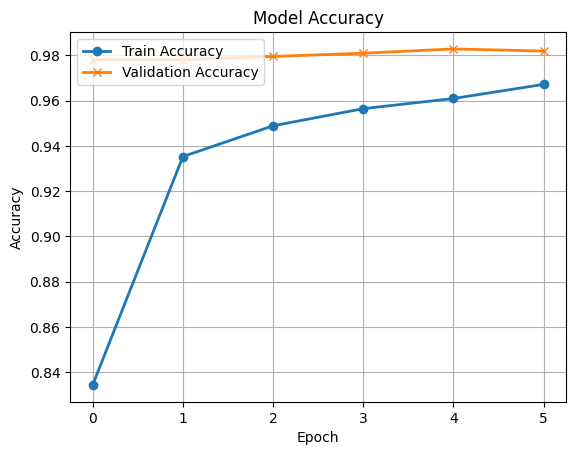

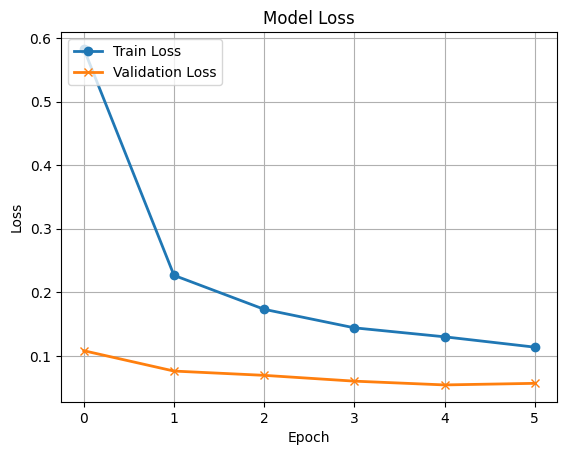

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'], marker='o', linewidth=2, label='Train Accuracy')
plt.plot(history.history['val_accuracy'], marker='x', linewidth=2, label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'], marker='o', linewidth=2, label='Train Loss')
plt.plot(history.history['val_loss'], marker='x', linewidth=2, label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()